In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
dataset = pd.read_csv('tripadvisor_hotel_reviews_clean.csv', delimiter=',')

In [168]:
dataset.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


<AxesSubplot:ylabel='Frequency'>

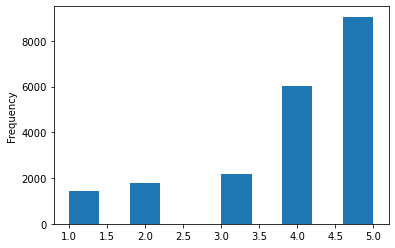

In [176]:
dataset['Rating'].plot.hist()

In [136]:
# To extract max 2000 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 200, ngram_range=(2, 2))
 
# X contains corpus (dependent variable)
X = cv.fit_transform(dataset['Review']).toarray()
 
# y contains answers if review
# is positive or negative
y = dataset['Rating']>3

cv.get_feature_names_out()

array(['air condit', 'arriv hotel', 'ask room', 'bar restaur',
       'beach beauti', 'beach pool', 'bed comfort', 'best hotel',
       'block away', 'book hotel', 'book room', 'bottl water',
       'boutiqu hotel', 'breakfast buffet', 'breakfast good',
       'breakfast includ', 'breakfast room', 'buffet breakfast',
       'central locat', 'clean comfort', 'clean room', 'clean staff',
       'comfort bed', 'comfort room', 'continent breakfast',
       'credit card', 'custom servic', 'day stay', 'definit recommend',
       'definit stay', 'desk staff', 'doubl bed', 'earli morn',
       'easi walk', 'enjoy stay', 'excel hotel', 'excel locat',
       'extrem help', 'feel like', 'felt like', 'flat screen',
       'floor room', 'food good', 'food great', 'free internet',
       'fresh fruit', 'friendli help', 'friendli staff', 'good food',
       'good hotel', 'good locat', 'good servic', 'good size',
       'good thing', 'good time', 'good valu', 'got room', 'great food',
       'great ho

In [137]:
# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [138]:
# n_estimators can be said as number of
# trees, experiment with n_estimators
# to get better results
model = RandomForestClassifier(n_estimators = 100, criterion = 'gini')
                             
model.fit(X_train, y_train)

RandomForestClassifier()

In [139]:
# Predicting the Test set results
y_pred = model.predict(X_test)
 
y_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [140]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
 
cm

array([[ 474,  827],
       [ 371, 3451]])

In [141]:
accuracy_score(y_test,y_pred)

0.7661526449346087

In [166]:
df = pd.DataFrame({'feature':cv.get_feature_names_out(),
                    'importance':model.feature_importances_})
df.sort_values('importance',ascending=False).head(20)

,feature,importance
58,great hotel,0.015846
71,highli recommend,0.015838
179,stay hotel,0.014269
141,room clean,0.013838
180,stay night,0.011348
130,punta cana,0.010868
177,star hotel,0.010808
29,definit stay,0.010588
84,hotel room,0.010440
25,credit card,0.010353


,feature,importance
58,great hotel,0.015846
71,highli recommend,0.015838
179,stay hotel,0.014269
141,room clean,0.013838
180,stay night,0.011348
130,punta cana,0.010868
177,star hotel,0.010808
29,definit stay,0.010588
84,hotel room,0.010440
25,credit card,0.010353


In [112]:
model.decision_path(X)

(<20491x937492 sparse matrix of type '<class 'numpy.int64'>'
 	with 128877419 stored elements in Compressed Sparse Row format>,
 array([     0,   9313,  18730,  28169,  37792,  47493,  56640,  66231,
         75544,  84889,  94392, 104125, 113368, 122733, 131862, 141289,
        150666, 159967, 169296, 178433, 188072, 197503, 206922, 216089,
        225452, 234683, 244164, 253613, 262878, 272099, 281592, 290841,
        300326, 310195, 319418, 328887, 338044, 347303, 356886, 366255,
        375810, 385157, 394582, 404061, 413228, 422687, 432132, 441461,
        450832, 460119, 469358, 478839, 488082, 497339, 506846, 516165,
        525648, 534955, 544432, 553849, 563158, 572437, 581700, 591137,
        600188, 609543, 619218, 628233, 637826, 647339, 656792, 665923,
        675570, 685051, 694426, 703705, 713260, 722639, 732074, 741339,
        750740, 760007, 769410, 779043, 788424, 797743, 806912, 816219,
        825348, 834575, 844030, 853365, 862648, 872231, 881668, 890845,
        